In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [3]:
dfg = pd.read_csv('wat-good.csv')
dfm = pd.read_csv('wat-mals.csv')

In [4]:
dfg

,time,router,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,target
0,7,0,2,0,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,26,26,1
1,11,1,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,25,26,1
2,15,2,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,24,26,1
3,19,3,1,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,23,26,1
4,23,7,0,3,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,22,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329108,3251515,0,0,1,0x4d2c0,3,1,1,4,16,29,13,0,0,3251494,10027,5,27,1
329109,3251516,0,0,1,0x4d2c0,3,2,1,4,16,29,13,0,0,3251494,10027,4,27,1
329110,3251517,0,0,1,0x4d2c0,3,3,1,4,16,29,13,0,0,3251494,10027,3,27,1
329111,3251517,4,3,1,0x4d2c0,3,4,2,4,16,29,13,0,0,3251494,10027,2,27,1


In [5]:
dfm

,time,router,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,target
0,7,0,2,0,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,59,59,0
1,7,1,1,0,0xecf40,0,0,3,2,8,1,1,29,13,3,1,58,59,0
2,11,5,1,3,0xecf40,0,0,3,2,8,1,1,29,13,3,1,57,59,0
3,11,1,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,56,59,0
4,15,2,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,55,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329108,3186311,11,0,3,0x656c0,4,4,2,2,8,0,0,27,11,3186259,10299,5,12,0
329109,3186312,11,0,3,0x616c0,0,0,3,2,9,0,0,27,11,3186260,10300,4,12,0
329110,3186319,11,4,0,0x656c0,5,0,0,2,8,27,11,29,13,3186315,10299,3,12,0
329111,3186323,10,4,2,0x656c0,5,0,0,2,8,27,11,29,13,3186315,10299,2,12,0


In [6]:
df = dfg.append(dfm, ignore_index=True)
df = df.sort_values('time')

In [7]:
df.to_csv('wat-time-pca-mcd.csv',index=False)
df = pd.read_csv("wat-time-pca-mcd.csv")
df

,time,router,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,target
0,7,0,2,0,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,26,26,1
1,7,1,1,0,0xecf40,0,0,3,2,8,1,1,29,13,3,1,58,59,0
2,7,0,2,0,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,59,59,0
3,11,5,1,3,0xecf40,0,0,3,2,8,1,1,29,13,3,1,57,59,0
4,11,1,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,56,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658221,3251515,0,0,1,0x4d2c0,3,1,1,4,16,29,13,0,0,3251494,10027,5,27,1
658222,3251516,0,0,1,0x4d2c0,3,2,1,4,16,29,13,0,0,3251494,10027,4,27,1
658223,3251517,0,0,1,0x4d2c0,3,3,1,4,16,29,13,0,0,3251494,10027,3,27,1
658224,3251517,4,3,1,0x4d2c0,3,4,2,4,16,29,13,0,0,3251494,10027,2,27,1


In [8]:
df.corr()

,time,router,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,target
time,1.000000,0.045252,-0.006598,0.018537,0.036963,0.009570,-0.014617,-0.024685,-0.029733,0.000980,0.023924,0.038687,0.059043,1.000000,0.981881,-0.031626,-0.054473,0.082487
router,0.045252,1.000000,0.196514,0.041851,0.039941,-0.011045,0.016852,0.047473,0.046143,0.433353,0.590154,0.104760,0.289989,0.045252,0.045956,0.209207,0.296200,0.005570
outport,-0.006598,0.196514,1.000000,-0.409028,0.010085,0.002590,-0.003971,0.339349,0.406087,0.356417,0.316219,-0.390821,-0.314492,-0.006594,-0.005635,0.094015,0.093111,0.004178
inport,0.018537,0.041851,-0.409028,1.000000,-0.049263,-0.007242,0.011064,-0.308897,-0.421968,-0.408046,-0.312571,0.376763,0.342501,0.018533,0.021109,0.042568,0.017116,0.008071
packet_type,0.036963,0.039941,0.010085,-0.049263,1.000000,0.220969,-0.337403,-0.257277,-0.287185,0.109978,0.056371,0.021082,-0.001464,0.036965,0.039859,0.046376,-0.002349,0.006802
flit_id,0.009570,-0.011045,0.002590,-0.007242,0.220969,1.000000,-0.000967,0.179914,0.149750,-0.014018,0.001786,-0.035448,-0.022919,0.009566,0.009593,-0.057730,0.016853,0.002161
flit_type,-0.014617,0.016852,-0.003971,0.011064,-0.337403,-0.000967,1.000000,-0.274699,-0.228641,0.021393,-0.002737,0.054113,0.034980,-0.014621,-0.014667,-0.048309,0.068266,-0.003289
vnet,-0.024685,0.047473,0.339349,-0.308897,-0.257277,0.179914,-0.274699,1.000000,0.970800,0.535558,0.473741,-0.824898,-0.599471,-0.024681,-0.028886,-0.102335,0.032395,-0.003693
vc,-0.029733,0.046143,0.406087,-0.421968,-0.287185,0.149750,-0.228641,0.970800,1.000000,0.532087,0.455849,-0.809734,-0.595874,-0.029728,-0.033703,-0.096296,0.022097,-0.005507
src_ni,0.000980,0.433353,0.356417,-0.408046,0.109978,-0.014018,0.021393,0.535558,0.532087,1.000000,0.895543,-0.566841,-0.408006,0.000984,-0.000350,-0.016040,0.202818,-0.002434


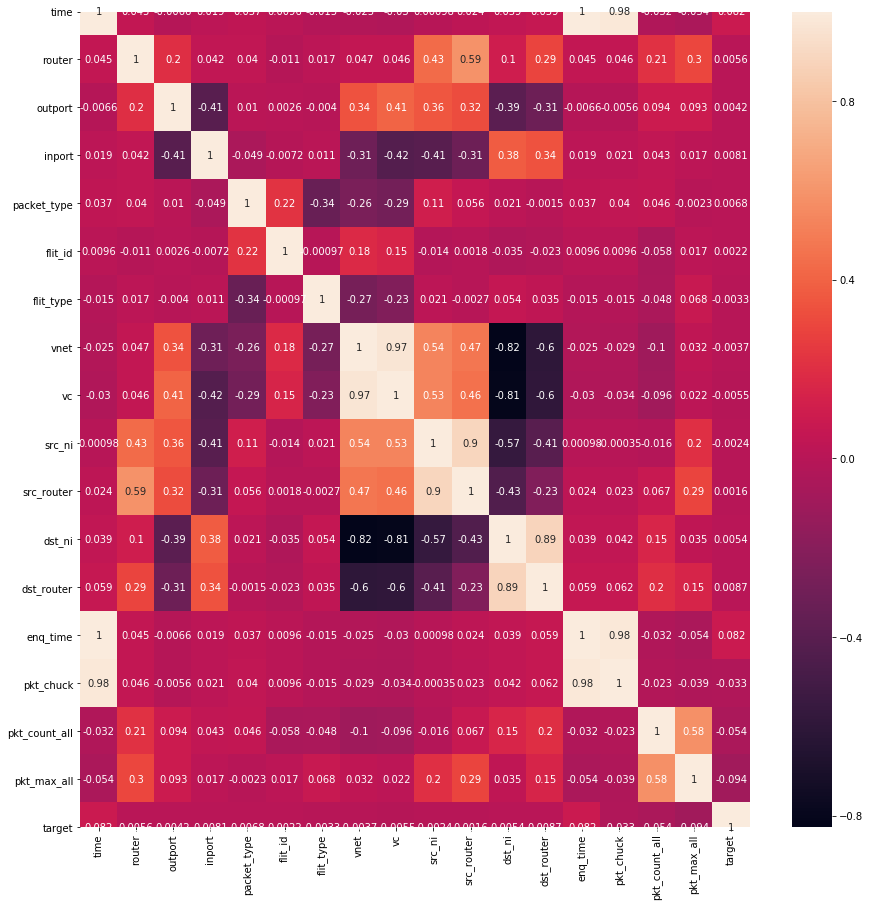

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [53]:
train_X = df.drop(columns=['target','time',"pkt_chuck","pkt_count_all","pkt_max_all","packet_address"])
train_X

,router,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time
0,0,2,0,0,0,3,2,8,0,0,23,7,3
1,1,1,0,0,0,3,2,8,1,1,29,13,3
2,0,2,0,0,0,3,2,8,0,0,23,7,3
3,5,1,3,0,0,3,2,8,1,1,29,13,3
4,1,2,4,0,0,3,2,8,0,0,23,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
658221,0,0,1,3,1,1,4,16,29,13,0,0,3251494
658222,0,0,1,3,2,1,4,16,29,13,0,0,3251494
658223,0,0,1,3,3,1,4,16,29,13,0,0,3251494
658224,4,3,1,3,4,2,4,16,29,13,0,0,3251494


In [14]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000000,0.50,0.00,0.0,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,0.466667,0.0
1,0.066667,0.25,0.00,0.0,0.00,1.000000,0.0,0.000000,0.032258,0.066667,0.935484,0.866667,0.0
2,0.000000,0.50,0.00,0.0,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,0.466667,0.0
3,0.333333,0.25,0.75,0.0,0.00,1.000000,0.0,0.000000,0.032258,0.066667,0.935484,0.866667,0.0
4,0.066667,0.50,1.00,0.0,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,0.466667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
658221,0.000000,0.00,0.25,0.5,0.25,0.333333,1.0,0.727273,0.935484,0.866667,0.000000,0.000000,1.0
658222,0.000000,0.00,0.25,0.5,0.50,0.333333,1.0,0.727273,0.935484,0.866667,0.000000,0.000000,1.0
658223,0.000000,0.00,0.25,0.5,0.75,0.333333,1.0,0.727273,0.935484,0.866667,0.000000,0.000000,1.0
658224,0.266667,0.75,0.25,0.5,1.00,0.666667,1.0,0.727273,0.935484,0.866667,0.000000,0.000000,1.0


In [15]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[-0.63037356, -0.32871988,  0.86843777, ...,  0.35178693,
        -0.44523052, -0.49435093],
       [-0.86098194, -0.09152054,  0.67547671, ...,  0.39603921,
        -0.45467264, -0.78341338],
       [-0.63037356, -0.32871988,  0.86843777, ...,  0.35178693,
        -0.44523052, -0.49435093],
       ...,
       [ 1.07010881, -0.26013528, -0.48256381, ..., -0.56479806,
         0.38149881, -0.43858625],
       [ 1.25485348, -0.02790744, -0.37991154, ..., -0.56328998,
        -0.13405847, -0.03742081],
       [ 1.06293241, -0.25054198, -0.54409059, ..., -0.68379776,
         0.29650137, -0.45355423]])

In [16]:
pca.explained_variance_ratio_

array([0.41206127, 0.14413706, 0.09074629, 0.07718876, 0.06786384,
       0.06402559, 0.05857717, 0.04791854])

Text(0, 0.5, 'Variance')

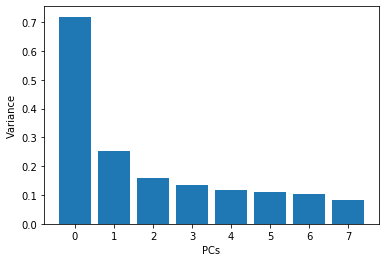

In [17]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [18]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6,7
0,-0.630374,-0.328720,0.868438,0.124182,-0.352704,0.351787,-0.445231,-0.494351
1,-0.860982,-0.091521,0.675477,0.024392,-0.343529,0.396039,-0.454673,-0.783413
2,-0.630374,-0.328720,0.868438,0.124182,-0.352704,0.351787,-0.445231,-0.494351
3,-1.017956,0.035232,0.349166,-0.373803,-0.500101,0.361052,-0.627034,-0.271354
4,-0.857432,-0.317085,0.486896,-0.384264,-0.569859,0.280894,-0.612833,0.155333
...,...,...,...,...,...,...,...,...
658221,1.049035,-0.208115,-0.146736,-0.500236,0.059962,-0.542690,0.369615,-0.447511
658222,1.059572,-0.234125,-0.314650,-0.342946,-0.014119,-0.553744,0.375557,-0.443049
658223,1.070109,-0.260135,-0.482564,-0.185656,-0.088200,-0.564798,0.381499,-0.438586
658224,1.254853,-0.027907,-0.379912,0.331015,-0.181071,-0.563290,-0.134058,-0.037421


In [19]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,4,5,6,7,target
0,-0.630374,-0.328720,0.868438,0.124182,-0.352704,0.351787,-0.445231,-0.494351,1
1,-0.860982,-0.091521,0.675477,0.024392,-0.343529,0.396039,-0.454673,-0.783413,0
2,-0.630374,-0.328720,0.868438,0.124182,-0.352704,0.351787,-0.445231,-0.494351,0
3,-1.017956,0.035232,0.349166,-0.373803,-0.500101,0.361052,-0.627034,-0.271354,0
4,-0.857432,-0.317085,0.486896,-0.384264,-0.569859,0.280894,-0.612833,0.155333,0
...,...,...,...,...,...,...,...,...,...
658221,1.049035,-0.208115,-0.146736,-0.500236,0.059962,-0.542690,0.369615,-0.447511,1
658222,1.059572,-0.234125,-0.314650,-0.342946,-0.014119,-0.553744,0.375557,-0.443049,1
658223,1.070109,-0.260135,-0.482564,-0.185656,-0.088200,-0.564798,0.381499,-0.438586,1
658224,1.254853,-0.027907,-0.379912,0.331015,-0.181071,-0.563290,-0.134058,-0.037421,1


In [20]:
final_df.corr()

,0,1,2,3,4,5,6,7,target
0,1.000000e+00,-3.249193e-15,5.168314e-16,-2.263650e-15,-3.043650e-15,-1.586712e-15,6.471637e-15,-2.888184e-15,-0.004823
1,-3.249193e-15,1.000000e+00,-5.014043e-15,-5.842709e-15,-2.002145e-15,1.067997e-15,-1.898081e-16,-2.615363e-15,0.009979
2,5.168314e-16,-5.014043e-15,1.000000e+00,-4.550174e-15,-3.534521e-15,-2.573697e-15,3.825145e-15,7.920491e-15,-0.012348
3,-2.263650e-15,-5.842709e-15,-4.550174e-15,1.000000e+00,-4.621638e-15,-2.019945e-15,-1.230124e-15,6.984967e-15,0.003737
4,-3.043650e-15,-2.002145e-15,-3.534521e-15,-4.621638e-15,1.000000e+00,8.668927e-16,-2.456498e-15,2.537072e-15,0.035977
5,-1.586712e-15,1.067997e-15,-2.573697e-15,-2.019945e-15,8.668927e-16,1.000000e+00,-1.879340e-15,9.570072e-16,-0.072343
6,6.471637e-15,-1.898081e-16,3.825145e-15,-1.230124e-15,-2.456498e-15,-1.879340e-15,1.000000e+00,6.511641e-15,-0.007241
7,-2.888184e-15,-2.615363e-15,7.920491e-15,6.984967e-15,2.537072e-15,9.570072e-16,6.511641e-15,1.000000e+00,0.007867
target,-4.823298e-03,9.979090e-03,-1.234774e-02,3.737446e-03,3.597714e-02,-7.234341e-02,-7.240717e-03,7.866687e-03,1.000000


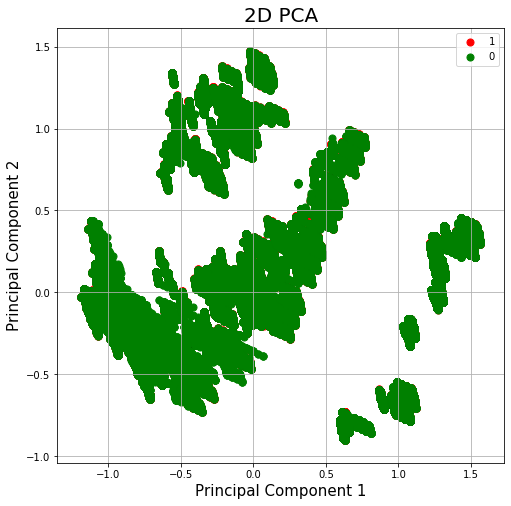

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [22]:
train_Y = df['target']

In [23]:
train_Y.value_counts()

1    329113
0    329113
Name: target, dtype: int64

#### machine learning models

In [24]:
X_train, X_test, y_train, y_test = train_test_split(principal_df, train_Y, test_size=0.3, random_state=0, shuffle = True)

In [25]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [26]:
logit_model=sm.Logit(train_Y,train_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.689666
         Iterations 4
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.005      
Dependent Variable: target           AIC:              907938.5182
Date:               2020-05-02 13:52 BIC:              908086.6831
No. Observations:   658226           Log-Likelihood:   -4.5396e+05
Df Model:           12               LL-Null:          -4.5625e+05
Df Residuals:       658213           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     4.0000                                        
---------------------------------------------------------------------
       Coef.     Std.Err.       z        P>|z|      [0.025     0.975]
---------------------------------------------------------------------
0     -0.0165      0.0117     -1.4064    0.1596    -0.0394     0.0065
1      0.0568      0.0080      7.0973    

In [27]:
logreg = LogisticRegression(C=1,penalty='l2',random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred = logreg.predict(X_test)
print('Accuracy {:.2f}'.format(accuracy_score(y_test,y_pred)))
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Accuracy 0.53
Train Prediction Score 52.7886656335864
Test Prediction  52.859197439585145


In [29]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[46191 52361]
 [40727 58189]]


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.47      0.50     98552
           1       0.53      0.59      0.56     98916

    accuracy                           0.53    197468
   macro avg       0.53      0.53      0.53    197468
weighted avg       0.53      0.53      0.53    197468



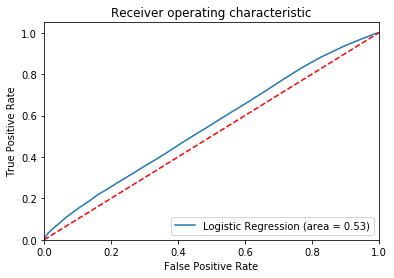

In [31]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [32]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
y_pred_knn= knn.predict(X_test)

In [34]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 66.09608514664966
Test Prediction  41.694350477039315


In [35]:
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

[[41532 57020]
 [58115 40801]]


In [36]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.42      0.42      0.42     98552
           1       0.42      0.41      0.41     98916

    accuracy                           0.42    197468
   macro avg       0.42      0.42      0.42    197468
weighted avg       0.42      0.42      0.42    197468



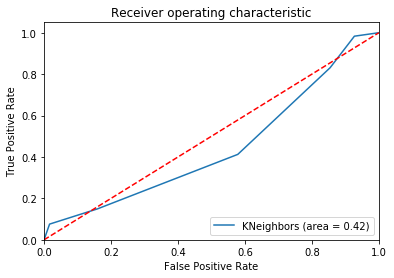

In [37]:
logit_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [39]:
#supportvectormachines
from sklearn.svm import SVC

In [ ]:
ksvc = SVC(kernel = 'rbf',random_state = 42,probability=True)
ksvc.fit(X_train,y_train)

In [ ]:
y_pred_ksvc= ksvc.predict(X_test)

In [ ]:
ksvc_score_train = ksvc.score(X_train,y_train)
print("Train Prediction Score",ksvc_score_train*100)
ksvc_score_test = accuracy_score(y_test,y_pred_ksvc)
print("Test Prediction Score",ksvc_score_test*100)

In [ ]:
cm = confusion_matrix(y_test, y_pred_ksvc)
print(cm)

In [ ]:
print(classification_report(y_test,y_pred_ksvc))

In [38]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [39]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [40]:
y_pred_nb= nb.predict(X_test)

In [41]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 52.796695879398726
Test Prediction Score 52.85463973909697


In [42]:
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)

[[44421 54131]
 [38966 59950]]


In [43]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.53      0.45      0.49     98552
           1       0.53      0.61      0.56     98916

    accuracy                           0.53    197468
   macro avg       0.53      0.53      0.53    197468
weighted avg       0.53      0.53      0.53    197468



In [44]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [45]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=10, validation_split=0.4 )

Train on 276454 samples, validate on 184304 samples
Epoch 1/10
276454/276454 [==============================] - 32s 117us/step - loss: 0.6915 - accuracy: 0.5194 - val_loss: 0.6902 - val_accuracy: 0.5272
Epoch 2/10
276454/276454 [==============================] - 34s 123us/step - loss: 0.6901 - accuracy: 0.5273 - val_loss: 0.6899 - val_accuracy: 0.5286
Epoch 3/10
276454/276454 [==============================] - 32s 115us/step - loss: 0.6899 - accuracy: 0.5277 - val_loss: 0.6898 - val_accuracy: 0.5285
Epoch 4/10
276454/276454 [==============================] - 35s 128us/step - loss: 0.6899 - accuracy: 0.5276 - val_loss: 0.6898 - val_accuracy: 0.5280
Epoch 5/10
276454/276454 [==============================] - 37s 133us/step - loss: 0.6899 - accuracy: 0.5277 - val_loss: 0.6898 - val_accuracy: 0.5285
Epoch 6/10
276454/276454 [==============================] - 31s 112us/step - loss: 0.6899 - accuracy: 0.5278 - val_loss: 0.6898 - val_accuracy: 0.5283
Epoch 7/10
276454/276454 [================

In [47]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 52.90%


In [48]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(4, activation='relu', input_shape=(n_cols,)))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=20, validation_split=0.4 )

Train on 276454 samples, validate on 184304 samples
Epoch 1/20
276454/276454 [==============================] - 27s 96us/step - loss: 0.2498 - accuracy: 0.5190 - val_loss: 0.2495 - val_accuracy: 0.5213
Epoch 2/20
276454/276454 [==============================] - 27s 97us/step - loss: 0.2494 - accuracy: 0.5216 - val_loss: 0.2492 - val_accuracy: 0.5248
Epoch 3/20
276454/276454 [==============================] - 26s 94us/step - loss: 0.2491 - accuracy: 0.5247 - val_loss: 0.2489 - val_accuracy: 0.5276
Epoch 4/20
276454/276454 [==============================] - 27s 96us/step - loss: 0.2489 - accuracy: 0.5267 - val_loss: 0.2488 - val_accuracy: 0.5275
Epoch 5/20
276454/276454 [==============================] - 27s 96us/step - loss: 0.2488 - accuracy: 0.5270 - val_loss: 0.2487 - val_accuracy: 0.5273
Epoch 6/20
276454/276454 [==============================] - 25s 91us/step - loss: 0.2487 - accuracy: 0.5271 - val_loss: 0.2487 - val_accuracy: 0.5268
Epoch 7/20
276454/276454 [======================

In [49]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 52.81%


In [50]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=20, validation_split=0.4 )

Train on 276454 samples, validate on 184304 samples
Epoch 1/20
276454/276454 [==============================] - 34s 122us/step - loss: 0.2496 - accuracy: 0.5131 - val_loss: 0.2495 - val_accuracy: 0.5154
Epoch 2/20
276454/276454 [==============================] - 30s 110us/step - loss: 0.2495 - accuracy: 0.5166 - val_loss: 0.2494 - val_accuracy: 0.5178
Epoch 3/20
276454/276454 [==============================] - 30s 109us/step - loss: 0.2494 - accuracy: 0.5189 - val_loss: 0.2493 - val_accuracy: 0.5196
Epoch 4/20
276454/276454 [==============================] - 34s 123us/step - loss: 0.2493 - accuracy: 0.5202 - val_loss: 0.2492 - val_accuracy: 0.5215
Epoch 5/20
276454/276454 [==============================] - 31s 114us/step - loss: 0.2491 - accuracy: 0.5221 - val_loss: 0.2490 - val_accuracy: 0.5246
Epoch 6/20
276454/276454 [==============================] - 33s 118us/step - loss: 0.2490 - accuracy: 0.5245 - val_loss: 0.2489 - val_accuracy: 0.5250
Epoch 7/20
276454/276454 [================

In [51]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 53.00%


In [52]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(16, activation='relu', input_shape=(n_cols,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=20, validation_split=0.4 )

Train on 276454 samples, validate on 184304 samples
Epoch 1/20
276454/276454 [==============================] - 34s 125us/step - loss: 0.2500 - accuracy: 0.5057 - val_loss: 0.2499 - val_accuracy: 0.5097
Epoch 2/20
276454/276454 [==============================] - 31s 112us/step - loss: 0.2499 - accuracy: 0.5089 - val_loss: 0.2498 - val_accuracy: 0.5129
Epoch 3/20
276454/276454 [==============================] - 32s 115us/step - loss: 0.2498 - accuracy: 0.5109 - val_loss: 0.2497 - val_accuracy: 0.5148
Epoch 4/20
276454/276454 [==============================] - 30s 107us/step - loss: 0.2497 - accuracy: 0.5132 - val_loss: 0.2496 - val_accuracy: 0.5171
Epoch 5/20
276454/276454 [==============================] - 31s 111us/step - loss: 0.2495 - accuracy: 0.5160 - val_loss: 0.2494 - val_accuracy: 0.5230
Epoch 6/20
276454/276454 [==============================] - 34s 124us/step - loss: 0.2494 - accuracy: 0.5205 - val_loss: 0.2492 - val_accuracy: 0.5237
Epoch 7/20
276454/276454 [================

KeyboardInterrupt: 

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
principal_df[principal_df.duplicated()].shape